In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss,
    confusion_matrix
)

import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from sklearn import model_selection

## Import data

In [17]:
credit_df = pd.read_csv("credit_risk_dataset_red.csv")
display(credit_df)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,70000,RENT,0.0,MEDICAL,C,6425,13.72,0,0.09,N,2
1,33,44784,RENT,2.0,EDUCATION,D,10000,NaN,1,0.22,N,6
2,46,102000,RENT,0.0,PERSONAL,C,15000,13.22,0,0.15,Y,17
3,25,66420,MORTGAGE,1.0,EDUCATION,B,4000,12.18,0,0.06,N,2
4,24,95000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,15000,12.69,0,0.16,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,24,41000,RENT,4.0,EDUCATION,A,10000,6.99,0,0.24,N,4
2996,25,90000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,10000,5.42,0,0.11,N,4
2997,23,28000,RENT,8.0,DEBTCONSOLIDATION,A,8000,7.74,0,0.29,N,4
2998,23,80000,RENT,5.0,EDUCATION,A,8000,7.90,0,0.10,N,3


In [18]:
# fill NaN with the mode
credit_df['person_emp_length'].fillna(credit_df['person_emp_length'].mode()[0], inplace=True)
credit_df['loan_int_rate'].fillna(credit_df['loan_int_rate'].median(), inplace=True)

C:\Users\Luis\AppData\Local\Temp\ipykernel_10364\1491313263.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_df['person_emp_length'].fillna(credit_df['person_emp_length'].mode()[0], inplace=True)
C:\Users\Luis\AppData\Local\Temp\ipykernel_10364\1491313263.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

## Statistics

In [4]:
# numerical variebles
num_cols = pd.DataFrame(credit_df[credit_df.select_dtypes(include=['float', 'int']).columns])
# print the numerical variebles
num_cols.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

### Continuous statistics

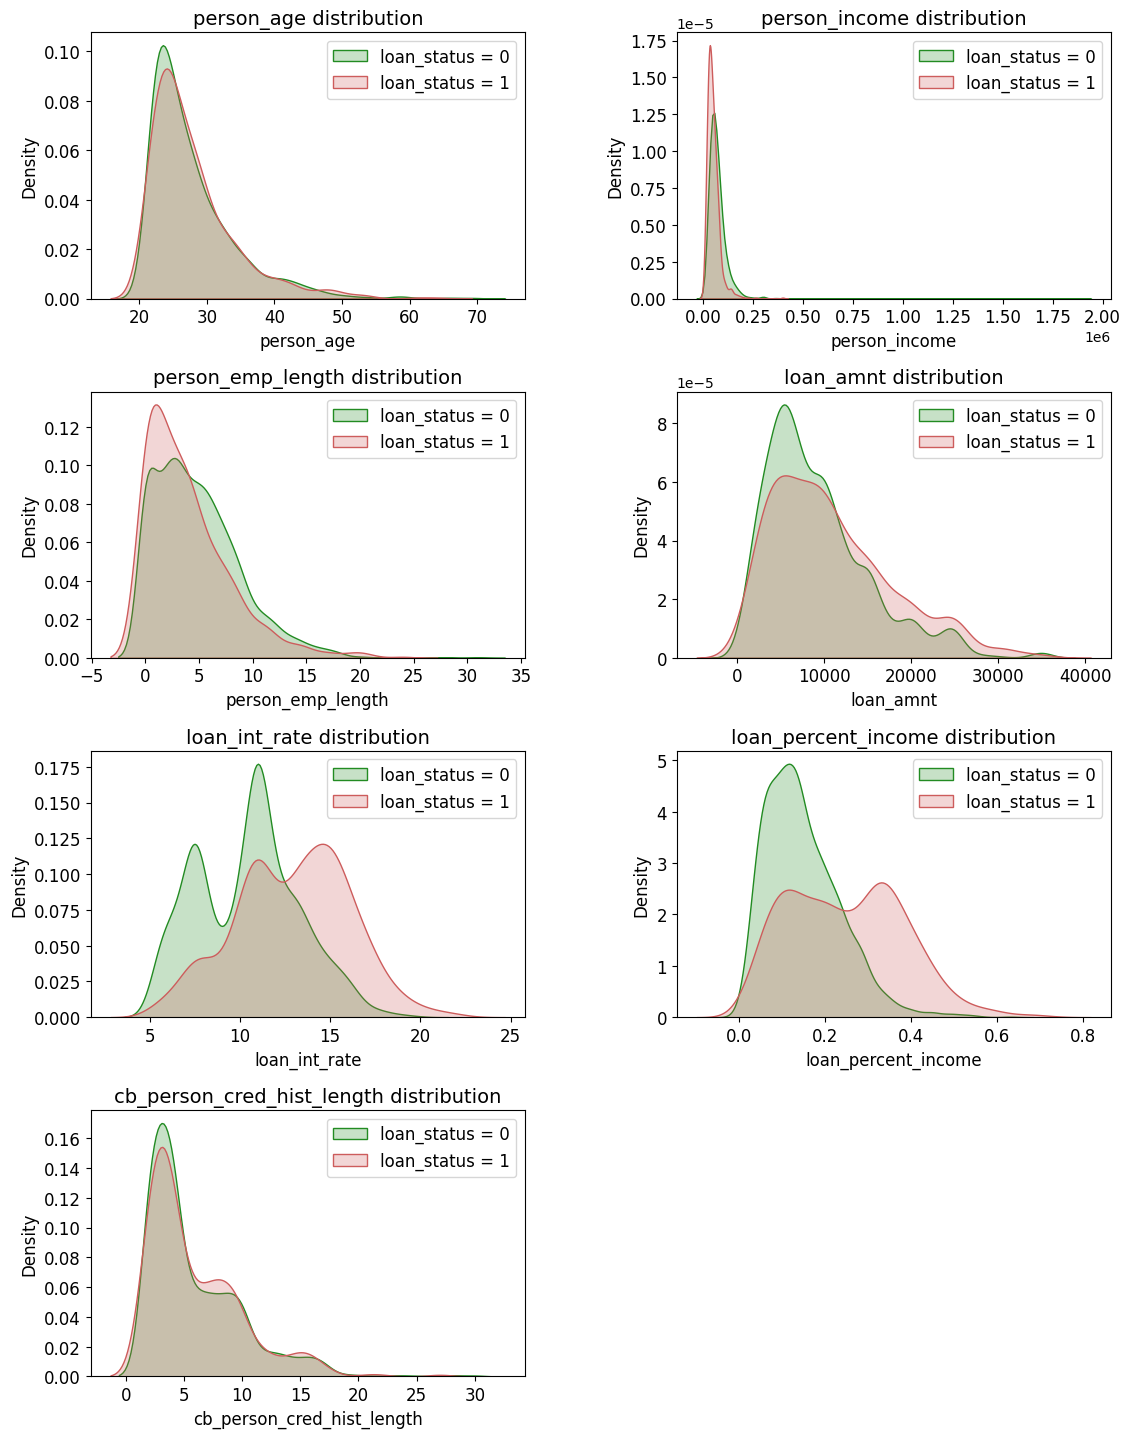

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of columns to plot, excluding 'loan_status'
# We do not drop it from the main dataframe 'num_cols' because we need it for filtering
columns_to_plot = num_cols.drop(['loan_status'], axis=1).columns

plt.figure(figsize=(12, 16))

for i, col in enumerate(columns_to_plot):
    # Calculate subplot index dynamically or keep your logic if fixed to 8 plots
    # Using dynamic calculation for flexibility: (rows, cols, index)
    plt.subplot(4, 2, i+1) 
    
    # Plot distribution for loan_status = 0
    # Using kdeplot for a smooth distribution curve
    sns.kdeplot(num_cols[num_cols['loan_status'] == 0][col], 
                color='forestgreen', label='loan_status = 0', fill=True)
    
    # Plot distribution for loan_status = 1
    sns.kdeplot(num_cols[num_cols['loan_status'] == 1][col], 
                color='indianred', label='loan_status = 1', fill=True)
    
    plt.title(col + ' distribution', fontsize=14)
    plt.ylabel('Density', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(prop={"size": 12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)
plt.show()

C:\Users\Luis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Luis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Luis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

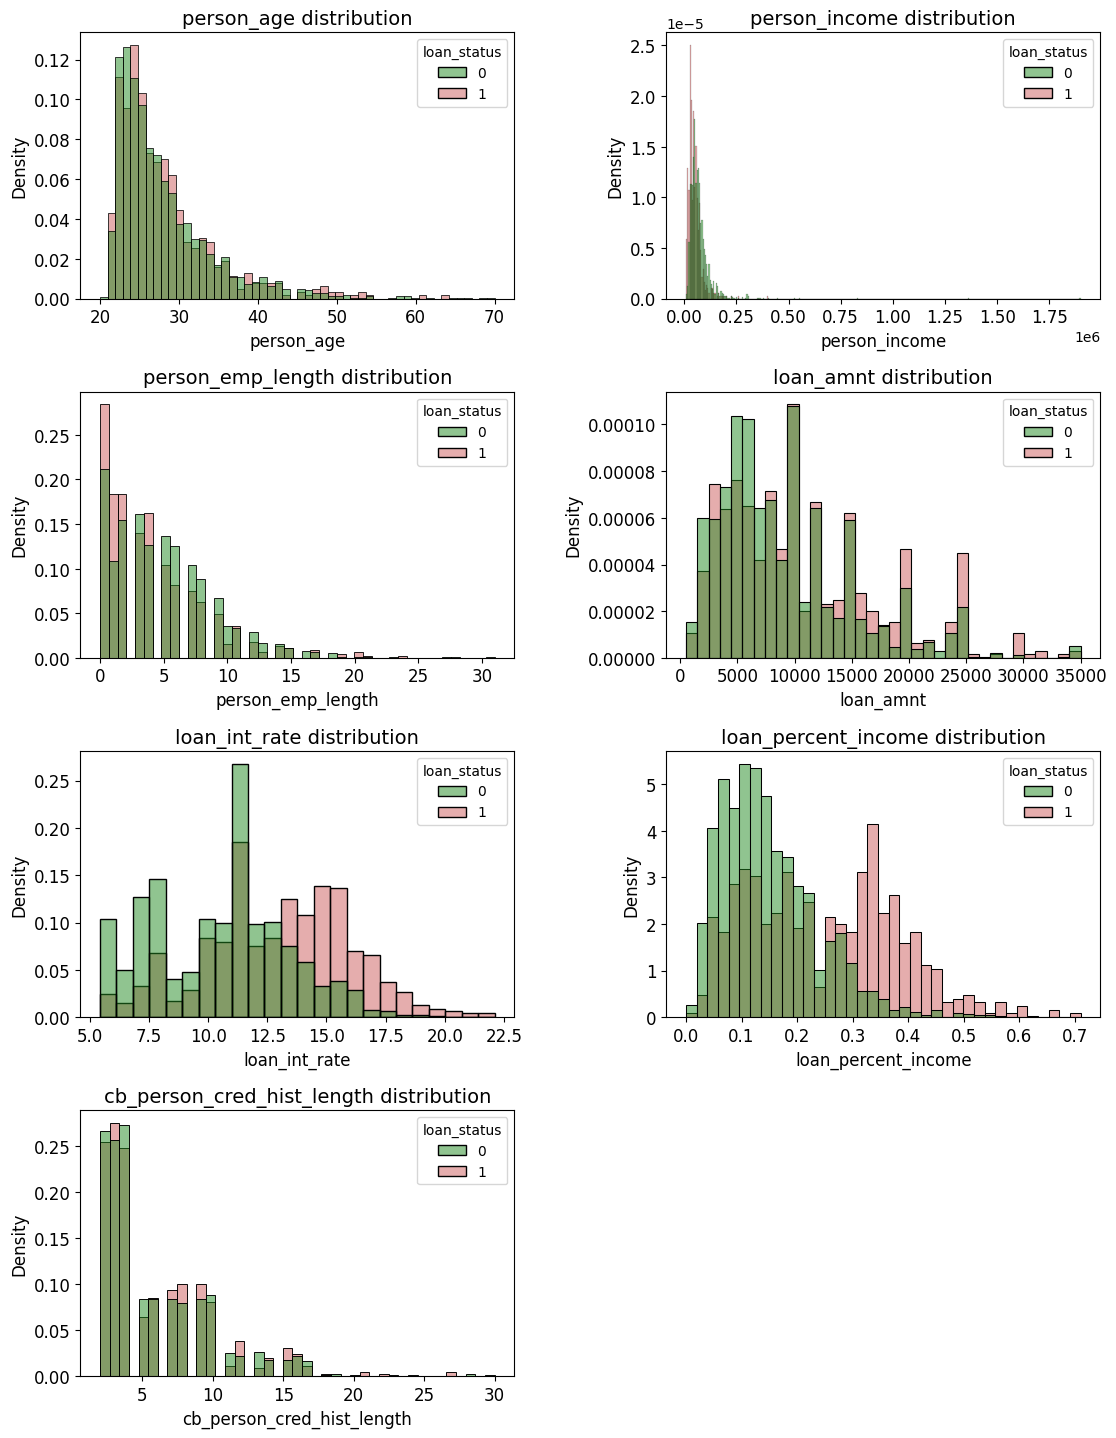

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of columns to plot, excluding 'loan_status'
cols_to_plot = num_cols.drop(['loan_status'], axis=1).columns

plt.figure(figsize=(12, 16))

for i, col in enumerate(cols_to_plot):
    plt.subplot(4, 2, i+1)
    
    # stat="density" changes the y-axis to density
    # common_norm=False ensures each group is normalized to 1 independently (good for imbalanced data)
    sns.histplot(data=num_cols, x=col, hue='loan_status', 
                 stat="density", common_norm=False,
                 kde=False, element="bars", fill=True,
                 palette={0: "forestgreen", 1: "indianred"},
                 alpha=0.5)
    
    plt.title(col + ' distribution', fontsize=14)
    plt.ylabel('Density', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)
plt.show()

C:\Users\Luis\AppData\Local\Temp\ipykernel_19900\3557246439.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols_hist[col], color='forestgreen',
C:\Users\Luis\AppData\Local\Temp\ipykernel_19900\3557246439.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols_hist[col], color='fore

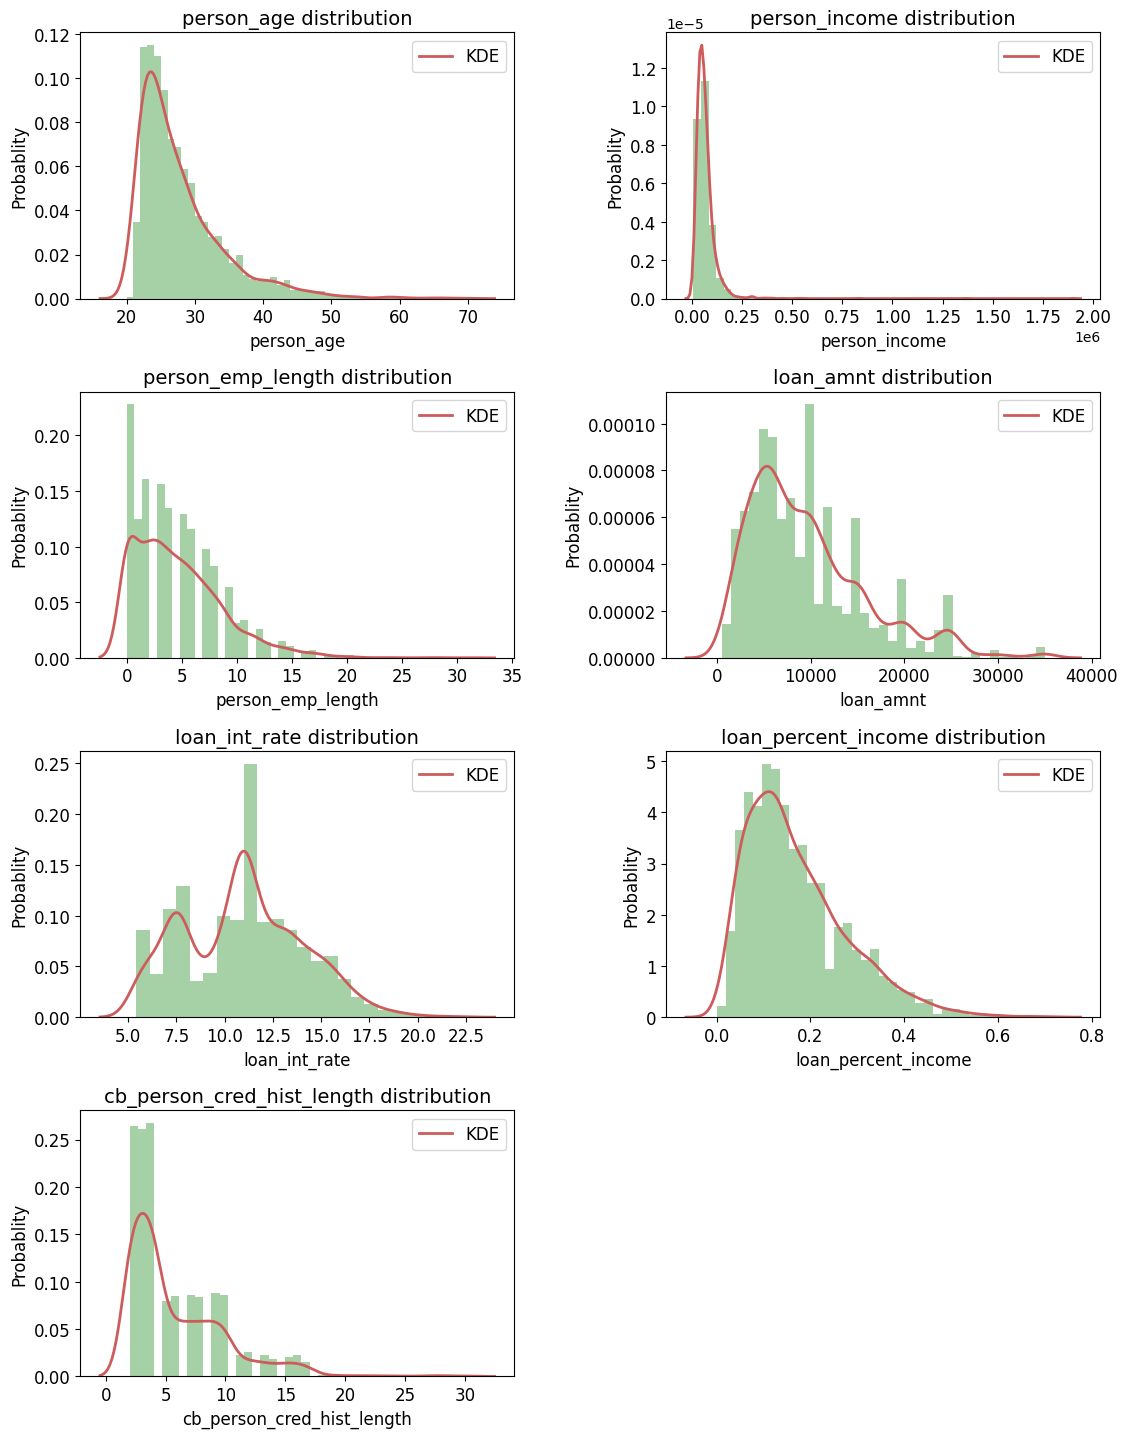

In [14]:
# drop the label column 'loan status' before visualization
num_cols_hist = num_cols.drop(['loan_status'], axis=1)
# visualize the distribution for each varieble
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='forestgreen', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()

## Generate csv for ML

In [19]:
# clean the dataset and drop outliers
cleaned_credit_df = credit_df[credit_df['person_age']<=100]
cleaned_credit_df = cleaned_credit_df[cleaned_credit_df['person_emp_length']<=60]
cleaned_credit_df = cleaned_credit_df[cleaned_credit_df['person_income']<=4e6]

In [20]:
# Transform N/Y to 0/1
cleaned_credit_df['cb_person_default_on_file'] = cleaned_credit_df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

In [10]:
# get the cleaned numberical variebles
cleaned_num_cols = pd.DataFrame(cleaned_credit_df[cleaned_credit_df.select_dtypes(include=['float', 'int']).columns])

In [11]:
# get the categorical variebles 
cat_cols = pd.DataFrame(cleaned_credit_df[cleaned_credit_df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade'], dtype='object')

In [12]:
encoded_cat_cols = pd.get_dummies(cat_cols)

In [13]:
cleaned_credit_df_num = pd.concat([cleaned_num_cols, encoded_cat_cols], axis=1)
cleaned_credit_df_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,24,70000,0.0,6425,13.72,0,0.09,0,2,False,...,True,False,False,False,False,True,False,False,False,False
1,33,44784,2.0,10000,10.99,1,0.22,0,6,False,...,False,False,False,False,False,False,True,False,False,False
2,46,102000,0.0,15000,13.22,0,0.15,1,17,False,...,False,True,False,False,False,True,False,False,False,False
3,25,66420,1.0,4000,12.18,0,0.06,0,2,True,...,False,False,False,False,True,False,False,False,False,False
4,24,95000,7.0,15000,12.69,0,0.16,0,2,True,...,False,False,False,False,True,False,False,False,False,False


In [14]:
cleaned_credit_df_num.to_csv('credit_risk_dataset_red_ml.csv', index=False)

### Apply scaling

In [15]:
scaler = MinMaxScaler()

# 3. Fit and Transform
# This calculates the min/max and scales the data
scaled_values = scaler.fit_transform(cleaned_credit_df)

# 4. Convert back to DataFrame (optional but recommended)
df_scaled = pd.DataFrame(scaled_values, columns=cleaned_credit_df.columns, index=cleaned_credit_df.index)

df_scaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0.08,0.032819,0.000000,0.171739,0.497304,0.0,0.126761,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.26,0.019492,0.064516,0.275362,0.333733,1.0,0.309859,0.0,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.52,0.049731,0.000000,0.420290,0.467346,0.0,0.211268,1.0,0.535714,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.10,0.030927,0.032258,0.101449,0.405033,0.0,0.084507,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.08,0.046031,0.225806,0.420290,0.435590,0.0,0.225352,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_scaled.to_csv('credit_risk_dataset_red_ml_scaled.csv', index=False)

### Ordinal encoding

In [23]:
cleaned_credit_df['loan_grade'].value_counts()

loan_grade
B    992
A    979
C    585
D    334
E     81
F     21
G      8
Name: count, dtype: int64

In [24]:
# Transform N/Y to 0/1
cleaned_credit_df['loan_grade'] = cleaned_credit_df['loan_grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

In [26]:
# get the cleaned numberical variebles
cleaned_num_cols = pd.DataFrame(cleaned_credit_df[cleaned_credit_df.select_dtypes(include=['float', 'int']).columns])

In [ ]:
# get the cleaned numberical variebles
cleaned_num_cols = pd.DataFrame(cleaned_credit_df[cleaned_credit_df.select_dtypes(include=['float', 'int']).columns])

In [27]:
# get the categorical variebles 
cat_cols = pd.DataFrame(cleaned_credit_df[cleaned_credit_df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent'], dtype='object')

In [28]:
encoded_cat_cols = pd.get_dummies(cat_cols)

In [29]:
cleaned_credit_df_num_ord = pd.concat([cleaned_num_cols, encoded_cat_cols], axis=1)
cleaned_credit_df_num_ord.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,24,70000,0.0,2,6425,13.72,0,0.09,0,2,False,False,False,True,False,False,False,True,False,False
1,33,44784,2.0,3,10000,10.99,1,0.22,0,6,False,False,False,True,False,True,False,False,False,False
2,46,102000,0.0,2,15000,13.22,0,0.15,1,17,False,False,False,True,False,False,False,False,True,False
3,25,66420,1.0,1,4000,12.18,0,0.06,0,2,True,False,False,False,False,True,False,False,False,False
4,24,95000,7.0,1,15000,12.69,0,0.16,0,2,True,False,False,False,True,False,False,False,False,False


In [30]:
cleaned_credit_df_num_ord.to_csv('credit_risk_dataset_red_ml_ord.csv', index=False)

### Apply scaling

In [31]:
scaler = MinMaxScaler()

# 3. Fit and Transform
# This calculates the min/max and scales the data
scaled_values = scaler.fit_transform(cleaned_credit_df_num_ord)

# 4. Convert back to DataFrame (optional but recommended)
df_scaled = pd.DataFrame(scaled_values, columns=cleaned_credit_df_num_ord.columns, index=cleaned_credit_df_num_ord.index)

df_scaled.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.08,0.032819,0.000000,0.333333,0.171739,0.497304,0.0,0.126761,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.26,0.019492,0.064516,0.500000,0.275362,0.333733,1.0,0.309859,0.0,0.142857,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.52,0.049731,0.000000,0.333333,0.420290,0.467346,0.0,0.211268,1.0,0.535714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.10,0.030927,0.032258,0.166667,0.101449,0.405033,0.0,0.084507,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.08,0.046031,0.225806,0.166667,0.420290,0.435590,0.0,0.225352,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_scaled.to_csv('credit_risk_dataset_red_ml_ord_scaled.csv', index=False)

In [30]:
cleaned_credit_df

,Unnamed: 0,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0.08,0.032819,0.000000,0.171739,0.497304,0.0,0.126761,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.26,0.019492,0.064516,0.275362,0.333733,1.0,0.309859,0.142857,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,0.52,0.049731,0.000000,0.420290,0.467346,0.0,0.211268,0.535714,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.10,0.030927,0.032258,0.101449,0.405033,0.0,0.084507,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.08,0.046031,0.225806,0.420290,0.435590,0.0,0.225352,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,0.08,0.017492,0.129032,0.275362,0.094068,0.0,0.338028,0.071429,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2996,2996,0.10,0.043389,0.290323,0.275362,0.000000,0.0,0.154930,0.071429,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2997,2997,0.06,0.010621,0.258065,0.217391,0.139005,0.0,0.408451,0.071429,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2998,2998,0.06,0.038104,0.161290,0.217391,0.148592,0.0,0.140845,0.035714,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
cleaned_credit_df.to_csv('credit_risk_dataset_red_ml.csv')

In [20]:
cleaned_credit_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,24,70000,0.0,6425,13.72,0,0.09,2,False,False,...,False,False,False,True,False,False,False,False,True,False
1,33,44784,2.0,10000,10.99,1,0.22,6,False,False,...,False,False,False,False,True,False,False,False,True,False
2,46,102000,0.0,15000,13.22,0,0.15,17,False,False,...,False,False,False,True,False,False,False,False,False,True
3,25,66420,1.0,4000,12.18,0,0.06,2,True,False,...,False,False,True,False,False,False,False,False,True,False
4,24,95000,7.0,15000,12.69,0,0.16,2,True,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,24,41000,4.0,10000,6.99,0,0.24,4,False,False,...,False,True,False,False,False,False,False,False,True,False
2996,25,90000,9.0,10000,5.42,0,0.11,4,True,False,...,False,True,False,False,False,False,False,False,True,False
2997,23,28000,8.0,8000,7.74,0,0.29,4,False,False,...,False,True,False,False,False,False,False,False,True,False
2998,23,80000,5.0,8000,7.90,0,0.10,3,False,False,...,False,True,False,False,False,False,False,False,True,False


In [33]:
cleaned_credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,70000,RENT,0.0,MEDICAL,2,6425,13.72,0,0.09,0,2
1,33,44784,RENT,2.0,EDUCATION,3,10000,10.99,1,0.22,0,6
2,46,102000,RENT,0.0,PERSONAL,2,15000,13.22,0,0.15,1,17
3,25,66420,MORTGAGE,1.0,EDUCATION,1,4000,12.18,0,0.06,0,2
4,24,95000,MORTGAGE,7.0,DEBTCONSOLIDATION,1,15000,12.69,0,0.16,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,24,41000,RENT,4.0,EDUCATION,0,10000,6.99,0,0.24,0,4
2996,25,90000,MORTGAGE,9.0,HOMEIMPROVEMENT,0,10000,5.42,0,0.11,0,4
2997,23,28000,RENT,8.0,DEBTCONSOLIDATION,0,8000,7.74,0,0.29,0,4
2998,23,80000,RENT,5.0,EDUCATION,0,8000,7.90,0,0.10,0,3


In [4]:
label = cleaned_credit_df['loan_status'] # labels
features = cleaned_credit_df.drop('loan_status',axis=1) # features
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, label, 
                                                                    random_state=42, test_size=.30)

### Balanced dataset

In [35]:
df_ord_balanced = pd.read_csv('credit_risk_dataset_red_ml_ord_scaled.csv')

In [37]:
df_ord_balanced['loan_status'].value_counts()

loan_status
0.0    2346
1.0     654
Name: count, dtype: int64

In [39]:
df_majority = df_ord_balanced[df_ord_balanced['loan_status'] == 0]
df_minority = df_ord_balanced[df_ord_balanced['loan_status'] == 1]

In [42]:
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

In [44]:
df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [45]:
c['loan_status'].value_counts()

loan_status
0.0    654
1.0    654
Name: count, dtype: int64

In [46]:
df_balanced.to_csv('credit_risk_dataset_red_ml_ord_balanced.csv', index=False)

## ML tests

In [2]:
df = pd.read_csv("credit_risk_dataset_red_ml_ord.csv")

label = df['loan_status'] # labels
features = df.drop('loan_status',axis=1) # features
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, label, 
                                                                    random_state=42, test_size=.30)

### Auxiliary functions

In [3]:
def create_prediction_df(model, X, y):
    """
    Creates a DataFrame containing the actual labels, model predictions, 
    and the confidence (probability) of the predicted class.

    Parameters:
    - model: A trained estimator (must have .predict(), ideally .predict_proba())
    - X: Input features (DataFrame or array-like)
    - y: True labels (Series or array-like)

    Returns:
    - pd.DataFrame with columns: ['y_true', 'y_pred', 'confidence']
    """
    
    # 1. Generate Predictions
    predictions = model.predict(X)
    
    # 2. Initialize the DataFrame
    # We use valid indices from y if it's a pandas object, otherwise default
    index = y.index if hasattr(y, 'index') else None
    results_df = pd.DataFrame({
        'y_true': y,
        'y_pred': predictions
    }, index=index)
    
    # 3. Calculate Confidence (if supported)
    if hasattr(model, "predict_proba"):
        # Get probabilities for all classes
        probas = model.predict_proba(X)
        
        # Extract the maximum probability for each row (the confidence of the chosen class)
        # axis=1 finds the max value across columns for each row
        confidence = np.max(probas, axis=1)
        
        results_df['confidence'] = confidence
    else:
        # Fallback for models that don't support probabilities (e.g., SVM without probability=True)
        results_df['confidence'] = np.nan
        print("Warning: Model does not support 'predict_proba'. Confidence set to NaN.")

    return results_df

In [4]:
def evaluate_classification(model, X, y):
    """
    Calculates accuracy, F1, precision, recall, support, and confusion matrix.

    Parameters:
    - model: The trained classification model (must have a .predict() method).
    - X: The features to predict on.
    - y: The true labels.

    Returns:
    - metrics: A dictionary containing 'accuracy' and 'confusion_matrix'.
    - report_df: A pandas DataFrame containing precision, recall, f1-score, and support per class.
    """
    # 1. Generate Predictions
    y_pred = model.predict(X)

    # 2. Calculate Metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # 3. Calculate Precision, Recall, F1, and Support
    # precise_recall_fscore_support returns lists for each class
    precision_l, recall_l, f1_l, support_l = precision_recall_fscore_support(y, y_pred)

    # 4. Create a DataFrame for per-class metrics
    # We attempt to use model.classes_ if available for row names, otherwise simple indices
    try:
        classes = model.classes_
    except AttributeError:
        classes = list(range(len(precision_l)))

    report_df = pd.DataFrame({
        'Precision': precision_l,
        'Recall': recall_l,
        'F1-Score': f1_l,
        'Support': support_l
    }, index=classes)

    # 5. Calculate Confusion Matrix
    conf_matrix = confusion_matrix(y, y_pred)

    
    y_proba = model.predict_proba(X)[:, 1]

    # 6. ROC AUC Score
    # Measures ability to distinguish between classes. 1.0 is perfect, 0.5 is random guessing.
    roc_auc = roc_auc_score(y, y_proba)

    # Bundle everything into a dictionary
    metrics = {
        "accuracy": accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        "confusion_matrix": conf_matrix,
        "roc_auc": roc_auc
    }


    print(report_df)

    for key in metrics.keys():
        print(key, metrics[key])
        
    print(conf_matrix)

    prediction_df = create_prediction_df(model, X, y)

    return metrics, report_df, prediction_df

In [5]:
def get_confidence_stats(df):
    """
    Returns a summary table with mean, min, and max confidence 
    for correct vs. incorrect predictions.
    """
    # Create a copy to avoid modifying the original dataframe
    df_stats = df.copy()
    
    # Create a boolean column for grouping
    df_stats['prediction_status'] = df_stats.apply(
        lambda row: 'Correct' if row['y_true'] == row['y_pred'] else 'Incorrect', 
        axis=1
    )
    
    # Group by the status and calculate statistics on the 'confidence' column
    summary = df_stats.groupby('prediction_status')['confidence'].agg(['mean', 'std', 'min', 'max', 'count'])
    
    return summary

### SVC

In [ ]:
model = SVC(kernel='linear', C=1.0)

# 4. Train the model
model.fit(x_train, y_train)

# 5. Make predictions
y_pred = evaluate_classification(model, x_test, y_test)

In [43]:
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

metrics, report_df, prediction_df = evaluate_classification(model, x_test, y_test)

   Precision    Recall  F1-Score  Support
0   0.852130  0.953717  0.900066      713
1   0.676471  0.368984  0.477509      187
accuracy 0.8322222222222222
Precision 0.6764705882352942
Recall 0.3689839572192513
F1-Score 0.47750865051903113
confusion_matrix [[680  33]
 [118  69]]
roc_auc 0.8107191875857828
[[680  33]
 [118  69]]


C:\Users\Luis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### XGboost

In [7]:
import xgboost

In [68]:
xgb_model = xgboost.XGBClassifier(objective="binary:logistic", random_state=42) 

xgb_model.fit(x_train, y_train)

metrics, report_df, prediction_df = evaluate_classification(xgb_model, x_test, y_test)

   Precision    Recall  F1-Score  Support
0   0.925729  0.978962  0.951602      713
1   0.897260  0.700535  0.786787      187
accuracy 0.9211111111111111
Precision 0.8972602739726028
Recall 0.7005347593582888
F1-Score 0.7867867867867868
confusion_matrix [[698  15]
 [ 56 131]]
roc_auc 0.9149635118614576
[[698  15]
 [ 56 131]]


In [69]:
stats = analyze_confidence_stats(prediction_df)

# Display results
print(f"Average Confidence when Correct:   {stats['Mean Confidence (Correct)']:.4f}")
print(f"Average Confidence when Incorrect: {stats['Mean Confidence (Incorrect)']:.4f}")

Average Confidence when Correct:   0.9572
Average Confidence when Incorrect: 0.8583


In [70]:
# --- Usage Example ---
stats_summary = get_confidence_stats(prediction_df)
print(stats_summary)

                       mean       std       min       max  count
prediction_status                                               
Correct            0.957187  0.084447  0.506864  0.999993    829
Incorrect          0.858256  0.129492  0.539907  0.999790     71


In [72]:
prediction_df['correct'] = (prediction_df['y_true'] == prediction_df['y_pred']).astype(int)

In [33]:
prediction_df['correct'].value_counts()

correct
1    829
0     71
Name: count, dtype: int64

In [39]:
prediction_df.loc[prediction_df['confidence'] < 0.95]['correct'].value_counts()

correct
1    164
0     47
Name: count, dtype: int64

In [73]:
prediction_df.loc[prediction_df['confidence'] < 0.98]['correct'].value_counts()

correct
1    313
0     55
Name: count, dtype: int64

In [76]:
len(y_train)

2100

In [78]:
metrics, report_df, prediction_df = evaluate_classification(xgb_model, x_train, y_train)

   Precision    Recall  F1-Score  Support
0   0.999388  1.000000  0.999694     1633
1   1.000000  0.997859  0.998928      467
accuracy 0.9995238095238095
Precision 1.0
Recall 0.9978586723768736
F1-Score 0.9989281886387996
confusion_matrix [[1633    0]
 [   1  466]]
roc_auc 1.0
[[1633    0]
 [   1  466]]


In [79]:
stats = analyze_confidence_stats(prediction_df)

# Display results
print(f"Average Confidence when Correct:   {stats['Mean Confidence (Correct)']:.4f}")
print(f"Average Confidence when Incorrect: {stats['Mean Confidence (Incorrect)']:.4f}")

Average Confidence when Correct:   0.9726
Average Confidence when Incorrect: 0.6885


In [80]:
prediction_df['correct'] = (prediction_df['y_true'] == prediction_df['y_pred']).astype(int)

In [82]:
prediction_df.loc[prediction_df['confidence'] < 0.95]['correct'].value_counts()

correct
1    328
0      1
Name: count, dtype: int64

### Random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(x_train, y_train)

metrics, report_df, prediction_df = evaluate_classification(rf_classifier, x_test, y_test)

   Precision    Recall  F1-Score  Support
0   0.915254  0.984572  0.948649      713
1   0.917293  0.652406  0.762500      187
accuracy 0.9155555555555556
Precision 0.9172932330827067
Recall 0.6524064171122995
F1-Score 0.7625
confusion_matrix [[702  11]
 [ 65 122]]
roc_auc 0.9047820836864644
[[702  11]
 [ 65 122]]


In [53]:
stats = analyze_confidence_stats(prediction_df)

# Display results
print(f"Average Confidence when Correct:   {stats['Mean Confidence (Correct)']:.4f}")
print(f"Average Confidence when Incorrect: {stats['Mean Confidence (Incorrect)']:.4f}")

Average Confidence when Correct:   0.8843
Average Confidence when Incorrect: 0.7604


In [54]:
# --- Usage Example ---
stats_summary = get_confidence_stats(prediction_df)
print(stats_summary)

                       mean       std  min  max  count
prediction_status                                     
Correct            0.884308  0.113512  0.5  1.0    824
Incorrect          0.760395  0.150248  0.5  1.0     76


In [55]:
prediction_df['correct'] = (prediction_df['y_true'] == prediction_df['y_pred']).astype(int)

In [56]:
prediction_df['correct'].value_counts()

correct
1    824
0     76
Name: count, dtype: int64

In [66]:
prediction_df.loc[prediction_df['confidence'] < 0.84]['correct'].value_counts()

correct
1    209
0     50
Name: count, dtype: int64

In [62]:
prediction_df.loc[prediction_df['confidence'] < 0.91]['correct'].value_counts()

correct
1    346
0     58
Name: count, dtype: int64

### MLP

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [13]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 20),  # Two hidden layers
    activation='relu',             # Rectified Linear Unit function
    solver='adam',                 # Optimizer
    alpha=0.001,                  # L2 penalty (regularization term)
    learning_rate_init=0.001,      # Initial learning rate
    max_iter=500,                  # Maximum number of iterations
    random_state=42
)

In [14]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50, 20), max_iter=500,
              random_state=42)

In [15]:
metrics, report_df, prediction_df = evaluate_classification(mlp, X_test_scaled, y_test)

   Precision    Recall  F1-Score  Support
0   0.911142  0.906031  0.908579      713
1   0.649215  0.663102  0.656085      187
accuracy 0.8555555555555555
Precision 0.6492146596858639
Recall 0.6631016042780749
F1-Score 0.656084656084656
confusion_matrix [[646  67]
 [ 63 124]]
roc_auc 0.8630851039893198
[[646  67]
 [ 63 124]]


### SVM

In [ ]:
model = SVC(kernel='linear', C=1.0)

# 4. Train the model
model.fit(x_train, y_train)

# 5. Make predictions
y_pred = evaluate_classification(model, x_test, y_test)